# Analyse fréquentielle via la FFT

### Partie 1 - Charger et découper un signal acoustique

In [227]:
import numpy as np
import matplotlib.pyplot as plt ### ou encore from matplotlib import pyplot as plt
### permet de faire des zoom, des recadrages grâce à la souris : 
%matplotlib notebook
%matplotlib inline



import importlib
###  les fonctions de codage/décodage WAV : 
from scipy.io import wavfile as io
from IPython.display import Audio


from IPython.display import display, Math, Latex
from scipy.fftpack import fft, fftshift


In [228]:
Fe, data = io.read('Domine_quando_veneris_debut.wav')
print('fréquence échantillonnage (Hz)= '+str(Fe))



print(np.shape(data))
x = (data[:,0]+data[:,1] )/2 ### conversion en mono

x=x/32000   ### sinon valeurs du signal trop grandes

begin_echan_signal1 = int(np.round(1.5 * Fe) - 1)
end_echan_signal1 = int(np.round(2.5 * Fe) - 1)
begin_echan_signal2 = int(np.round(6.5 * Fe) - 1)
end_echan_signal2 = int(np.round(7.5 * Fe) - 1)

signal1 = x[begin_echan_signal1:end_echan_signal1]
signal2 = x[begin_echan_signal2:end_echan_signal2]

N1= len(signal1)
N2= len(signal2)

PuissanceN1 = np.sum(np.square(signal1))/N1
PuissanceN2 = np.sum(np.square(signal2))/N2

print(PuissanceN1)
print(PuissanceN2)

fréquence échantillonnage (Hz)= 44100
(1173276, 2)
0.004260093045103459
0.00672557639972851


Text(0, 0.5, 'Amplitude')

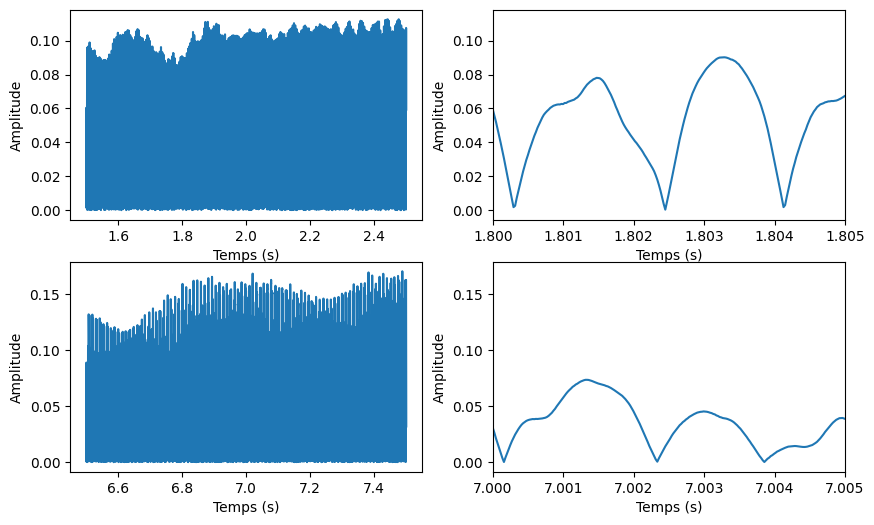

In [229]:
# graph 1 - signal 1
temps1=np.arange(1.5,2.5,1/44100)

plt.figure(1,figsize=(10,6))
plt.subplot(221)
plt.plot(temps1,np.abs(signal1))
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.subplot(222)
plt.plot(temps1,np.abs(signal1))
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.xlim(1.8,1.805)

temps2=np.arange(6.5,7.5,1/44100)

plt.subplot(223)
plt.plot(temps2,np.abs(signal2))
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.subplot(224)
plt.plot(temps2,np.abs(signal2))
plt.xlim(7,7.005)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')


In [230]:
son_signal1 = Audio(signal1, rate=Fe)
son_signal2 = Audio(signal2, rate=Fe)
display(son_signal1)
display(son_signal2)

Oui les deux parties sont stationnaires

<!-- epsace -->

<!-- epsace -->

<!-- epsace -->

<!-- epsace --> 

<!-- epsace -->


### Partie 2 - Dessiner un périodigramme

**Définition de la fonction periodo**
- Prend en paramètre : un signal, la fréquence d'échantillonage, Fmin et Fmax
- Renvoie : un périodigramme en décibels, les fréquences associées

In [231]:
def periodo(signal, Fe, fmin, fmax):
    N = len(signal)
    fft_signal = fft(signal)
    freq = np.fft.fftfreq(N, 1 / Fe)
    mask = (freq >= fmin) & (freq <= fmax)
    periodogram = np.abs(fft_signal) ** 2 / N
    periodogram_db = 10 * np.log10(periodogram)
    return freq[mask], periodogram_db[mask]

Text(0.5, 1.0, 'Périodigramme signal 1')

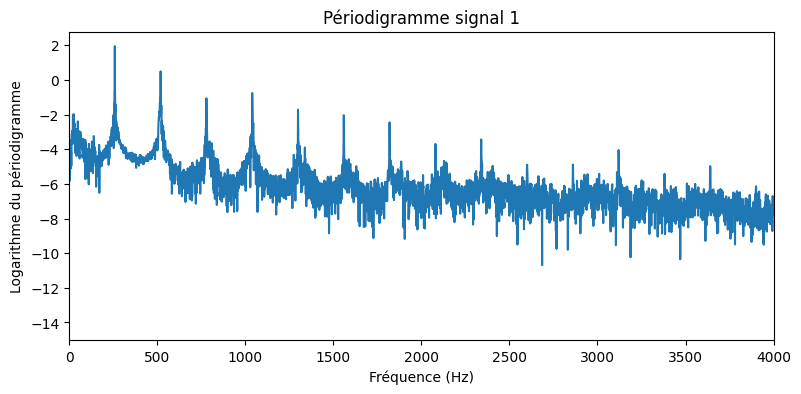

In [246]:
fft_signal1 = fft(signal1)

periodogram = np.abs(fft_signal1)**2/N1

plt.figure(2,figsize=(20,4))
plt.subplot(121)
plt.plot(np.log10(periodogram))
plt.xlim(0, 4000)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Logarithme du périodigramme')
plt.title('Périodigramme signal 1')

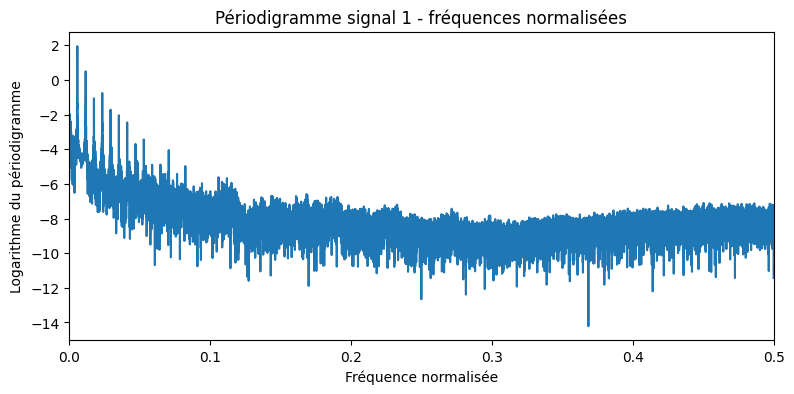

In [257]:
fft_signal1 = fft(signal1)
freq = np.linspace(0,1,44100)
freq_normalisee = (freq - np.min(freq)) / (np.max(freq) - np.min(freq))
periodogram = np.abs(fft_signal1)**2/N1


plt.figure(3,figsize=(20,4))
plt.subplot(121)
plt.plot(freq_normalisee, np.log10(periodogram))
plt.xlim(0, 0.5)
plt.xlabel('Fréquence normalisée')
plt.ylabel('Logarithme du périodigramme')
plt.title('Périodigramme signal 1 - fréquences normalisées')
plt.show()

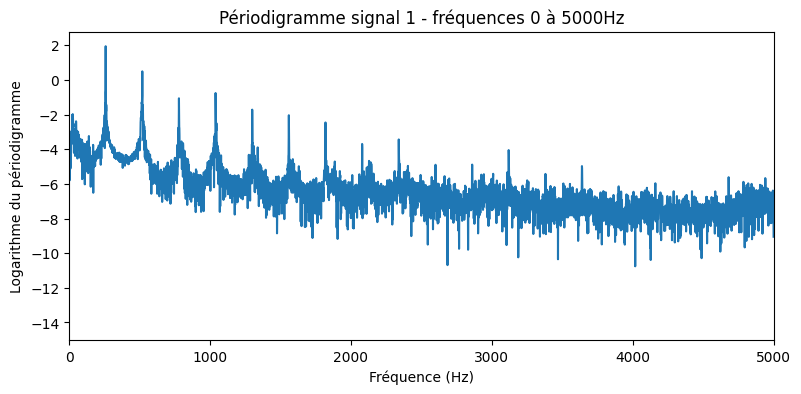

In [259]:
freq_normalized = np.linspace(0, 1, len(signal1)) * Fe
freq_range = np.linspace(0, 5000, len(signal1))
periodogram_normalized = np.abs(fft_signal1) ** 2 / N1

plt.figure(4,figsize=(20,4))
plt.subplot(121)
plt.plot(freq_range, np.log10(periodogram_normalized))
plt.xlim(0, 5000)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Logarithme du périodigramme')
plt.title('Périodigramme signal 1 - fréquences 0 à 5000Hz')
plt.show()

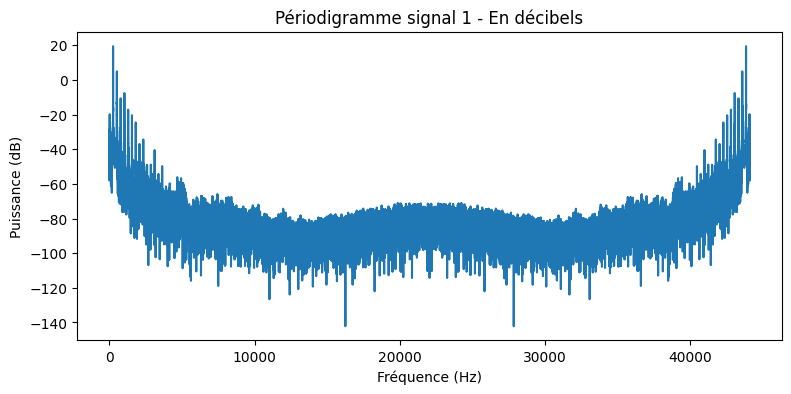

In [256]:

plt.figure(5,figsize=(20,4))

periodogram_db = 10 * np.log10(periodogram)

plt.subplot(122)
plt.plot(freq*44100, periodogram_db)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Puissance (dB)')
plt.title('Périodigramme signal 1 - En décibels')
plt.show()

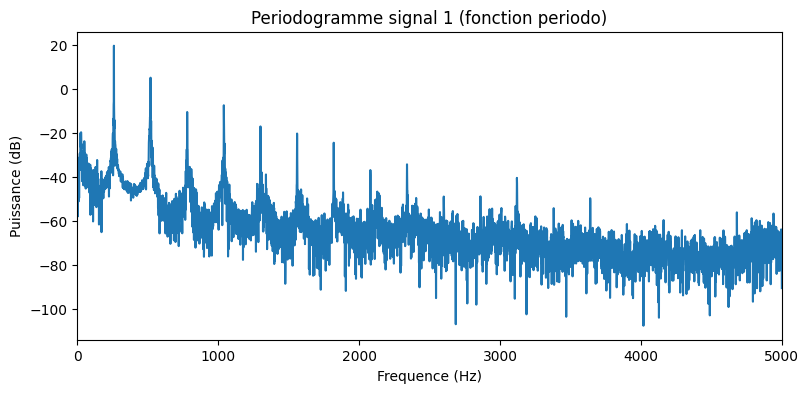

In [236]:
fmin = 0
fmax = 5000
freq2, periodogram_db2 = periodo(signal1, Fe, fmin, fmax)
plt.figure(1,figsize=(20,4))
plt.subplot(121)
plt.plot(freq2, periodogram_db2)
plt.xlim(fmin, fmax)
plt.xlabel('Frequence (Hz)')
plt.ylabel('Puissance (dB)')
plt.title('Periodogramme signal 1 (fonction periodo)')
plt.show()

<!-- epsace -->

<!-- epsace -->

<!-- epsace -->

<!-- epsace -->

<!-- epsace --> 

### Partie 3 - Interpréter un périodigramme

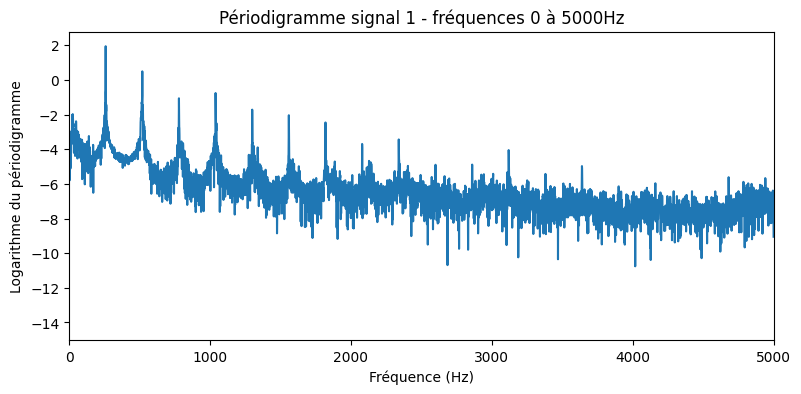

In [258]:
plt.figure(4,figsize=(20,4))
plt.subplot(121)
plt.plot(freq*44100, np.log10(periodogram))
plt.xlim(0, 5000)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Logarithme du périodigramme')
plt.title('Périodigramme signal 1 - fréquences 0 à 5000Hz')
plt.show()

 l'axe des x du second sous-graphe est étiqueté en fréquence (Hz) de 0 à 5000. Le tableau freq_normalized est créé en mettant à l'échelle les fréquences normalisées (0 à 1) par la fréquence d'échantillonnage Fe. Le tableau freq_range représente la plage de fréquence souhaitée de 0 à 5000 Hz. Le périodogramme est ensuite tracé en fonction de freq_range à l'aide de periodogram_normalized. Les fonctions xlabel, ylabel et title sont utilisées pour ajouter des étiquettes et des titres appropriés au sous-graphe.